<font size=4 color='blue'>
    
# <center> Clase 6, noviembre 4 del 2020</center>
    
    
    
 <img src="ML.jpg">
    
 fuente: [Machine learning for data-driven discovery in solid Earth geoscience](https://science.sciencemag.org/content/363/6433/eaau0323)

<font size=4 color='blue'>
    
# <center> Unsupervised Learning </center>

<font size=5 color='blue'>
Extracting information by forming Clusters

<font size=4 color='black'>

[Article about Kmeans](./Literature/Kmeans_article.pdf)

<font size=5 color='blue'>

Kmeans Algorithm


<font size=4 color='black'>

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 
    
It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. 
    
It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. 
    
The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

<font size=4 color='black'>

The way kmeans algorithm works is as follows:

    Specify number of clusters K.
    
    Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
    
    Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

    Compute the sum of the squared distance between data points and all centroids.
    Assign each data point to the closest cluster (centroid).
    
    Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

<font size=4 color='black'>

The used metric to detect the clusters is:

    
$$ J = \sum_{i=1}^m \sum_{k=1}^K {w_i}_k ||x^{i} - \mu_k||^2$$
    
where ${w_i}_k$ = 1 for data point $x_i$ if it belongs to cluster k; otherwise, ${w_i}_k$=0. Also, $\mu_k$ is the centroid of $x_i$’s cluster.


<font size=5 color='blue'>

Examples of systems with iformation that can separated in clusters

<font size=4 color='blue'>

# <center> Geyser’s Eruptions </center>

<font size=4 color='black'>
Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA

In [1]:
from IPython.display import HTML

HTML("""
<video width="520" height="340" controls>
  <source src="yell-InDepth-Geysers2_640x360.mp4" type="video/mp4">
</video>
""")


In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

C:\Users\Larec_4\Miniconda3\envs\karen\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


<font size=4 color='blue'>

[sklearn_paper](./Literature/Scikit-learn_2011.pdf)
    
[scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/)
    
[seaborn: statistical data visualization](https://seaborn.pydata.org/)

In [3]:
import sklearn.cluster
help(sklearn.cluster)

Help on package sklearn.cluster in sklearn:

NAME
    sklearn.cluster

DESCRIPTION
    The :mod:`sklearn.cluster` module gathers popular unsupervised clustering
    algorithms.

PACKAGE CONTENTS
    _affinity_propagation
    _agglomerative
    _bicluster
    _birch
    _dbscan
    _dbscan_inner
    _feature_agglomeration
    _hierarchical_fast
    _k_means_elkan
    _k_means_fast
    _k_means_lloyd
    _kmeans
    _mean_shift
    _optics
    _spectral
    affinity_propagation_
    bicluster
    birch
    dbscan_
    hierarchical
    k_means_
    mean_shift_
    optics_
    setup
    spectral
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.cluster._affinity_propagation.AffinityPropagation(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
        sklearn.cluster._agglomerative.AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
            sklearn.cluster._agglomerative.FeatureAgglomeration(sklearn.cluster._aggl

<font size=4 color='black'>

The Python code of sklearn for KMeans is the file _kmeans.py

<font size=5 color='blue'>

Reading Geyser’s Eruptions data set

<font size=4 color='blue'>
    
[Geyser’s Eruptions data set](https://www.kaggle.com/janithwanni/old-faithful)

In [4]:
# Import the data
df = pd.read_csv('old_faithful.csv')

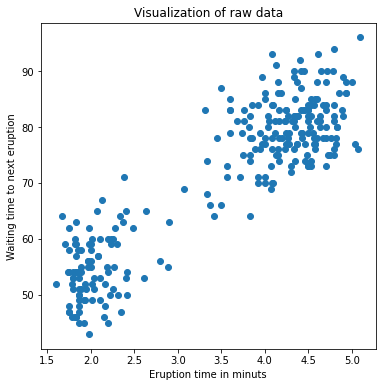

In [5]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in minuts')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [6]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(272, 2)


In [7]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


<font size=5 color='blue'>
Normalizing information data

In [8]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler)

In [9]:
print(type(X_std))
print(X_std.shape)

<class 'numpy.ndarray'>
(272, 2)


In [10]:
print(X_std[0:5][:])

[[ 0.09849886  0.59712344]
 [-1.48145856 -1.24518118]
 [-0.13586149  0.22866251]
 [-1.05750332 -0.6556437 ]
 [ 0.91744345  1.03927655]]


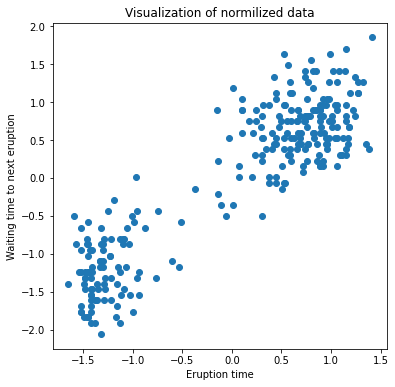

In [11]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.xlabel('Eruption time')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of normilized data');

<font size=5 color='blue'>
Generating the architecture of the model

In [12]:
# Run local implementation of kmeans
model = KMeans(n_clusters=2, max_iter=100, init='random',n_init=10)

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


**n_clusters:** int, default=8

    The number of clusters to form as well as the number of centroids to generate.
    
**max_iter:** int, default=300

    Maximum number of iterations of the k-means algorithm for a single run.

**init:** {‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’

    Method for initialization:

    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

    ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.


**n_init:** int, default=10

    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


<font size=5 color='blue'>
Training the model to find clusters

In [13]:
#km.fit(X_std)
model.fit(X_std)

KMeans(init='random', max_iter=100, n_clusters=2)

[Methods](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit)

 **fit(X, y=None, sample_weight=None)**
 
**X:**{array-like, sparse matrix} of shape (n_samples, n_features)

    Training instances to cluster. It must be noted that the data will be converted to C ordering, which will cause a memory copy if the given data is not C-contiguous. If a sparse matrix is passed, a copy will be made if it’s not in CSR format.
    
**y:** Ignored

    Not used, present here for API consistency by convention.
    
**sample_weight:** array-like of shape (n_samples,), default=None

    The weights for each observation in X. If None, all observations are assigned equal weight.

<font size=5 color='blue'>
Extracting information of the recognized clusters

In [14]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

Attributes

**cluster_centers_:** ndarray of shape (n_clusters, n_features)

        Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter),           these will not be consistent with labels_.
    
**labels_:** ndarray of shape (n_samples,)

        Labels of each point

<font size=5 color='blue'>
Plotting clusters

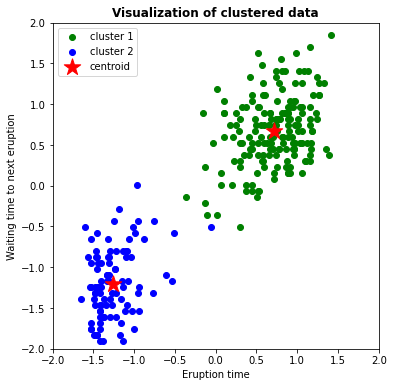

In [15]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels == 0, 0], X_std[labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels == 1, 0], X_std[labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

<font size=4 color='blue'>
    
# <center> Iris Clustering </center>

<img src="iris.jpg">

<font size=5 color='blue'>
Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa

-- Iris Versicolour

-- Iris Virginica

<font size=4 color='black'>
For visualizing the clusters, we will use only three of the variables associated to the iris flowers: petal width (X[:,3]), sepal length (X[:,0]), and petal length (X[:,2]). 

In [16]:
import numpy as np
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

[Dataset loading utilities](https://scikit-learn.org/stable/datasets/index.html)

<font size=5 color='blue'>

Reading Iris data set

<font size=4 color='blac'>
    
[Iris Data set](https://archive.ics.uci.edu/ml/datasets/iris)

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# y is only used to generate the picture of the Ground Truth

In [18]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [19]:
print(X[0])

[5.1 3.5 1.4 0.2]


<font size=5 color='blue'>
Generating the architecture for 3 different models: different number of clusters and different way of centroids initialization

In [20]:
np.random.seed(5)

models = [('k_means_iris_8', KMeans(n_clusters=8, n_init=10)),
          ('k_means_iris_3', KMeans(n_clusters=3, n_init=10)),
          ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,init='random'))]

<font size=5 color='blue'>
Training the model to find clusters using the tree different models

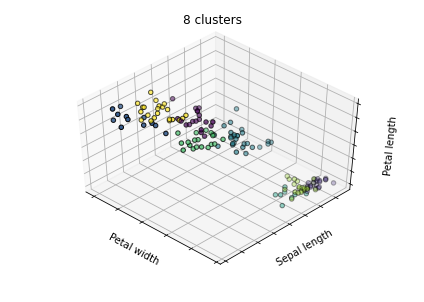

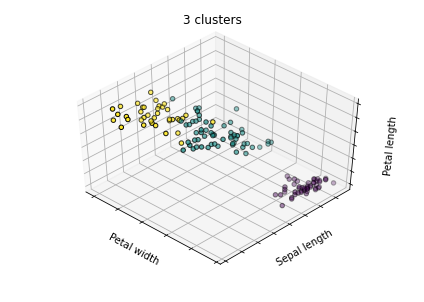

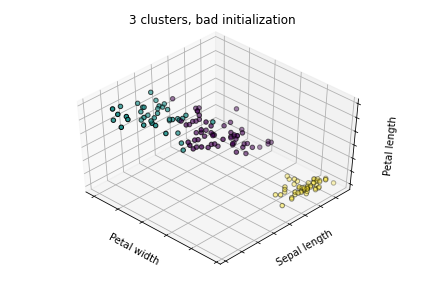

In [21]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, model in models:
    fig = plt.figure(fignum, figsize=(6, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

<font size=5 color='blue'>
Ground Truth 
<font size=4 color='black'>
   
It means, checking Machine Learning accuracy with real world

C:\Users\Larec_4\Miniconda3\envs\karen\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


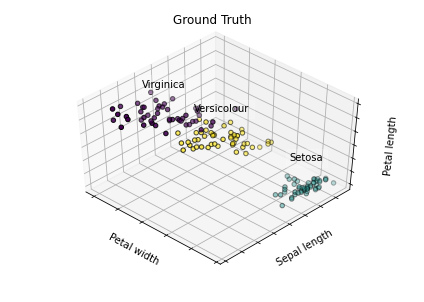

In [22]:
# Plot the ground truth (Verdad fundamental, vedad de la distribución)

fig = plt.figure(fignum, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

<font size=4 color='blue'>

# <center> Digits clustering </center>

In [23]:
import numpy as np
from PIL import Image
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


<font size=5 color='blue'>

Reading digits data set

<font size=4 color='black'>

[digits data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

In [24]:
digits = load_digits()

data = digits.data

In [25]:
print(data.shape)

(1797, 64)


In [26]:
sample_num = 10

print(data[sample_num,:])

[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


In [27]:
image_0=data[sample_num]

In [28]:
image=image_0.reshape(8,8)

In [29]:
print(image.shape)

(8, 8)


(-0.5, 7.5, 7.5, -0.5)

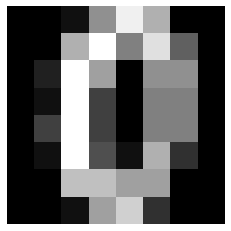

In [30]:
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')

In [31]:
# Images colors will be inverted
data=255.0-data

(-0.5, 7.5, 7.5, -0.5)

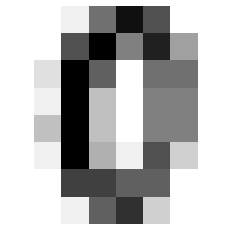

In [32]:
plt.imshow(data[sample_num,:].reshape(8,8), cmap=plt.cm.gray)
plt.axis('off')

<font size=5 color='blue'>
Generating the architecture of the model

In [33]:
np.random.seed(1)
model = KMeans(n_clusters=10,init='random')

<font size=5 color='blue'>
Training the model to find the clusters

In [34]:
model.fit(data)

KMeans(init='random', n_clusters=10)

<font size=5 color='blue'>

Predicting the closest cluster each sample in data belongs to 

In [35]:
my_cluster = model.predict(data)
print(my_cluster.shape)
print(my_cluster)

(1797,)
[8 0 0 ... 0 1 1]


<font size=5 color='blue'>

Showing the predicted digits clusters

cluster 0
223 elements


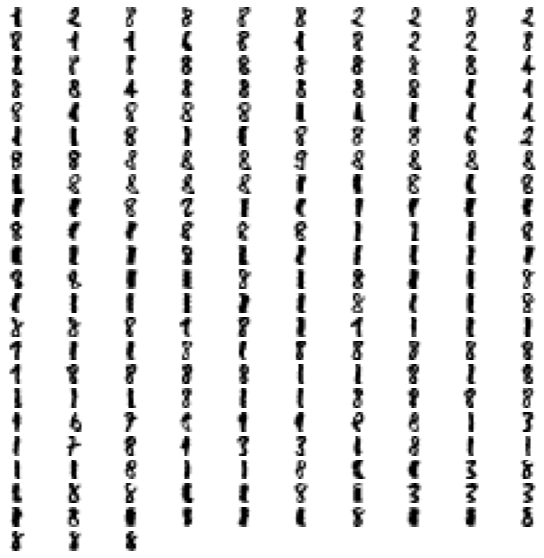

cluster 1
245 elements


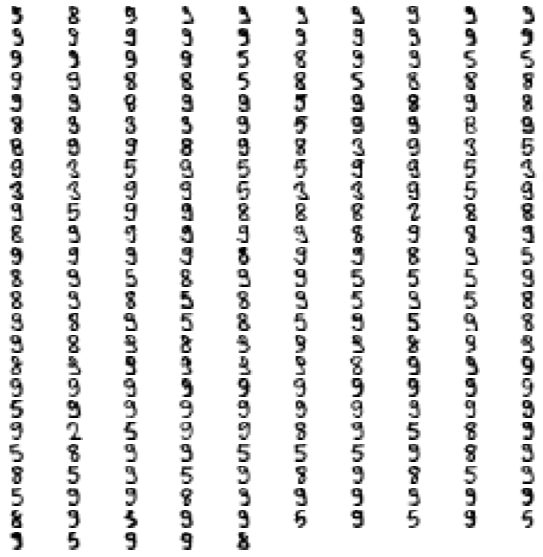

cluster 2
98 elements


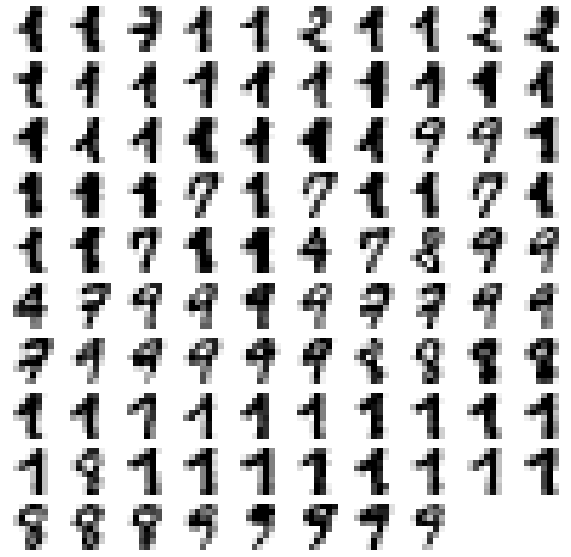

cluster 3
179 elements


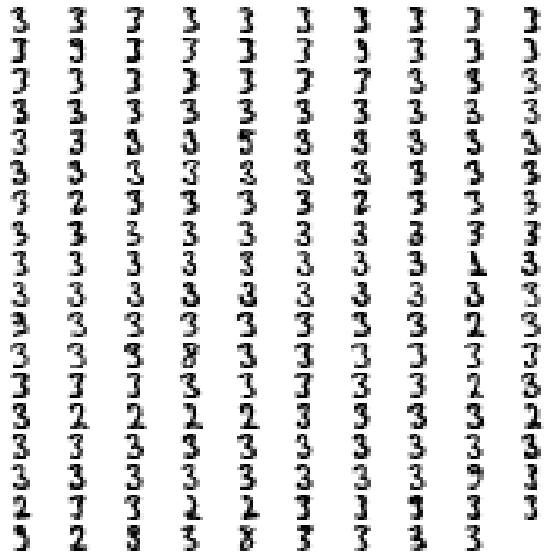

cluster 4
170 elements


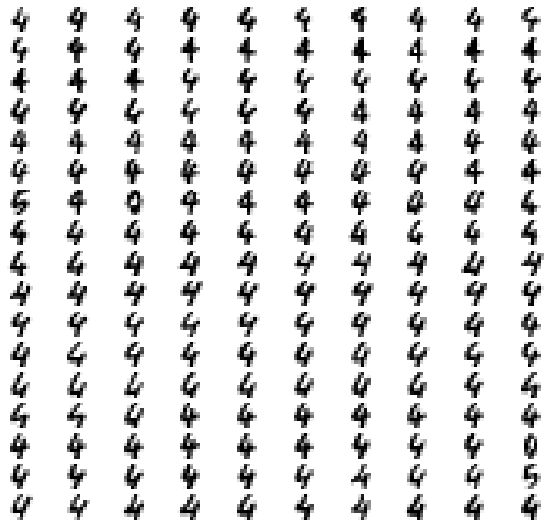

cluster 5
182 elements


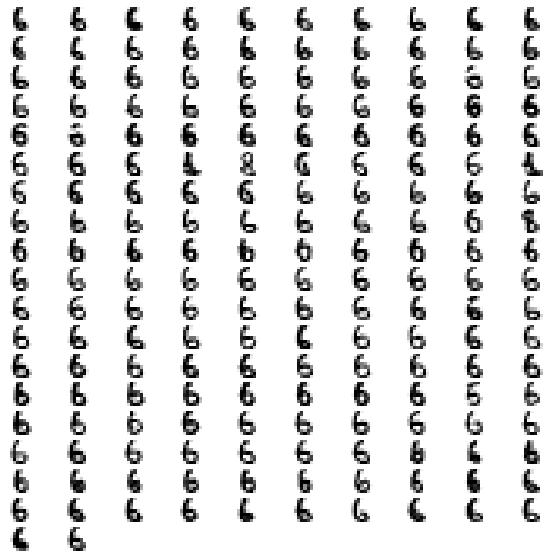

cluster 6
199 elements


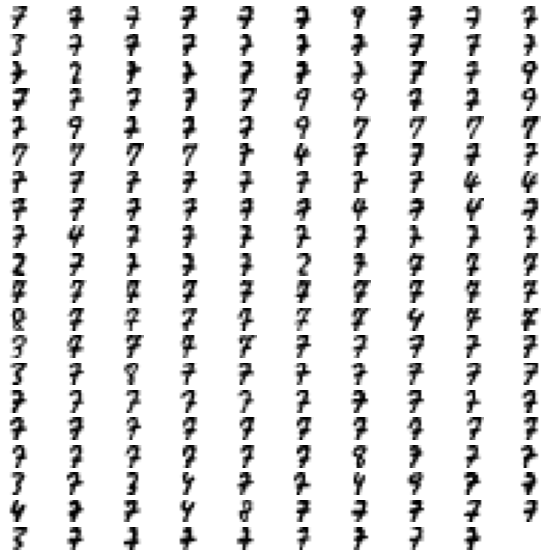

cluster 7
174 elements


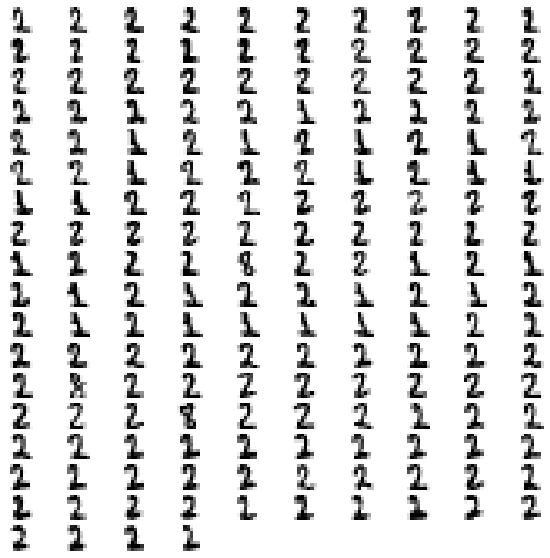

cluster 8
178 elements


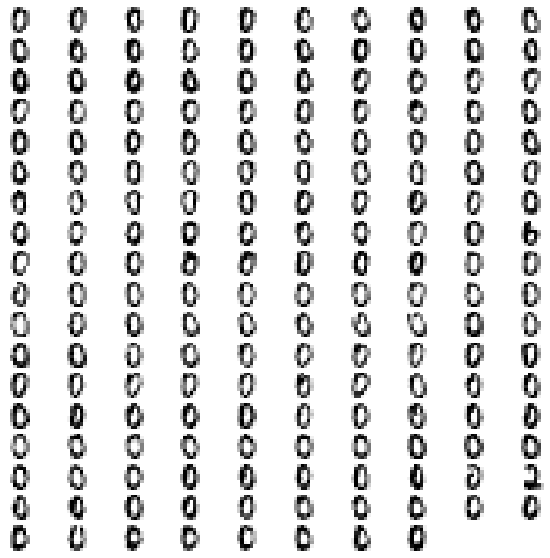

cluster 9
149 elements


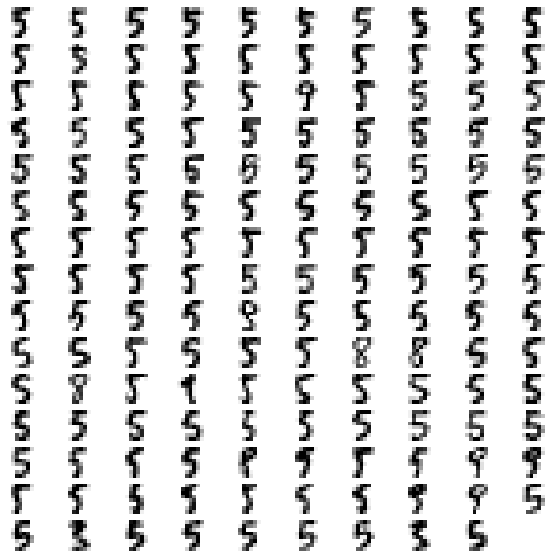

In [36]:
for i in range(0,10):  
    
    row = np.where(my_cluster==i)[0] 
    num = row.shape[0]      
    
    r = np.floor(num/10.)    
    print("cluster " + str(i))
    print(str(num) + " elements")

    plt.figure(figsize = (10,10))

    # Showing the digits in each cluster
    for k in range(0, num):
        
        plt.subplot(r+1, 10, k+1)
               
        imagen = data[row[k], ]
        
        imagen = imagen.reshape(8, 8)
        
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')

    plt.show()

Pueden revisar otros ejemplos en: [Kmeans](https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html)